#### Importing necessary libraries

In [41]:
import copy

# Importing necessary libraries
import pandas as pd
import numpy as np
import datetime


In [42]:
# Load the dataset and preprocess
df = pd.read_csv("preprocessed_dataset.csv")
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

In [44]:
df.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Silica Concentrate
date,,,,,,,,,,,,,,,,,,,,,
2017-03-10 01:03:00,56.39,13.53,2082.27,391.733,403.738,9.70067,1.74925,250.509,251.163,250.610,...,250.389,249.430,606.023,596.422,604.776,437.700,430.352,433.920,443.036,1.40
2017-03-10 01:03:20,55.20,16.98,3019.53,557.434,395.713,10.06640,1.74000,249.214,253.235,250.576,...,250.225,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,1.31
2017-03-10 01:03:40,55.20,16.98,3024.41,563.965,397.383,10.06720,1.74000,249.719,250.532,250.862,...,250.137,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,1.31
2017-03-10 01:04:00,55.20,16.98,3043.46,568.054,399.668,10.06800,1.74000,249.741,247.874,250.313,...,251.345,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,1.31
2017-03-10 01:04:20,55.20,16.98,3047.36,568.665,397.939,10.06890,1.74000,249.917,254.487,250.049,...,250.422,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,1.31


#### Useful variables selection

In [45]:
print("TODO")

TODO


#### Interpolate hourly variables

In [46]:
# Hourly changed variables: Iron Feed, Silica Feed, Silica Concentrate
iron_feed = df["% Iron Feed"]
silica_feed = df["% Silica Feed"]
silica_concentrate = df["% Silica Concentrate"]

minutes = iron_feed.index.minute.to_numpy()
seconds = iron_feed.index.second.to_numpy()

df["% Iron Feed"] = iron_feed.where(minutes + seconds == 0)
df["% Silica Feed"] = silica_feed.where(minutes + seconds == 0)
df["% Silica Concentrate"] = silica_concentrate.where(minutes + seconds == 0)

df = df.interpolate(method='polynomial', order=3)
df = df.dropna()
df

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Silica Concentrate
date,,,,,,,,,,,,,,,,,,,,,
2017-03-10 02:00:00,55.200000,16.980000,3168.36,540.039,394.482,10.16130,1.67324,249.631,250.170,251.169,...,250.247,249.214,443.508,352.896,462.530,462.461,464.530,444.602,401.345,1.310000
2017-03-10 02:00:20,55.200018,16.979970,3121.00,544.312,395.640,10.16070,1.67220,249.950,250.192,250.159,...,250.291,251.180,426.591,345.421,465.576,469.843,468.936,472.466,416.382,1.306776
2017-03-10 02:00:40,55.200036,16.979940,3118.46,549.713,386.162,10.16010,1.67117,249.686,249.840,249.170,...,250.247,250.291,429.944,460.236,467.169,463.064,471.223,493.270,448.911,1.303582
2017-03-10 02:01:00,55.200053,16.979911,3147.27,540.131,391.406,10.15950,1.67014,249.269,245.610,248.566,...,250.291,248.873,450.139,486.288,455.219,441.813,462.989,494.026,481.052,1.300418
2017-03-10 02:01:20,55.200070,16.979882,3170.41,539.673,399.697,10.15890,1.66910,249.291,248.269,248.313,...,250.488,249.774,462.601,488.724,441.674,433.629,448.477,480.866,489.382,1.297283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-09 23:58:40,49.749902,23.200208,2710.94,441.052,386.570,9.62129,1.65365,302.344,298.786,299.163,...,346.794,313.695,392.160,430.702,872.008,418.725,497.548,446.357,416.892,1.724402
2017-09-09 23:59:00,49.749926,23.200157,2692.01,473.436,384.939,9.62063,1.65352,303.013,301.879,299.487,...,330.023,236.700,401.505,404.616,864.409,418.377,506.398,372.995,426.337,1.720848
2017-09-09 23:59:20,49.749950,23.200106,2692.20,500.488,383.496,9.61874,1.65338,303.662,307.397,299.487,...,329.590,225.879,408.899,399.316,867.598,419.531,503.414,336.035,433.130,1.717264


#### PLS loop

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
from model import Model
from sklearn.metrics import mean_squared_error, r2_score, f1_score
import progressbar  # pip install progressbar2
import copy
from joblib import dump, load
import warnings
warnings.filterwarnings('ignore')

def q2_score(Y, y_t, y_fit_t):
    tss_res = np.sum((np.array(Y) - np.mean(Y))**2)
    press = np.sum((np.array(y_t) - np.array(y_fit_t))**2)
    return 1 - press / tss_res

df_array = df.to_numpy()
print(df_array.shape)

# Reduce the amount of observations (with averaging)
df = df.resample("10T").mean()

included_rows1 = [df.index.get_loc(datetime.datetime(2017, 4, 23, 19, 0, 00)),
                    df.index.get_loc(datetime.datetime(2017, 5, 13, 0, 0, 00))]
included_rows2 = [df.index.get_loc(datetime.datetime(2017, 6, 15, 1, 0, 00)),
                    df.index.get_loc(datetime.datetime(2017, 7, 24, 0, 0, 00))]
included_rows3 = [df.index.get_loc(datetime.datetime(2017, 8, 15, 1, 0, 00)),
                    df.index.get_loc(datetime.datetime(2017, 9, 10, 0, 0, 00))]
excluded_rows1 = [17700, 19000]

df_array = df.to_numpy()
print(df_array.shape)

models = []
max_comp_num = 12
windows = [4, 7, 10, 14, 20, 26, 33]


(737454, 22)
(26491, 22)


In [34]:
# Find best window_size and num_of_components
for window_size in progressbar.progressbar(windows):  # [10, 20, 30, ...]
        # Division of data into training, validation and test sets for the normal functioning times:
        # about 70% for training, 15% for validation, 15% for testing
        test_size = round(0.15 * window_size)
        test_start = '2017-04-23 20:00:00' # example start of test partition
        test_start = datetime.datetime.strptime(test_start, '%Y-%m-%d %H:%M:%S')

        # Models with same window size (they all take the same windows, no need to get them multiple times...)
        models_one_win_size = [Model((window_size, i), [], []) 
                               for i in range(1, max_comp_num)]
        print("Start...")
        flag = 0
        iteration_count = 0
        row_number = df.index.get_loc(test_start)
        # Iterate through the data
        while flag == 0:
            
            iteration_count += 1
            if iteration_count % 1000 == 0:    
                print(iteration_count)
                
            test_data, training_data = None, None
            test_y_end = row_number + test_size + 1
            training_X_start = row_number - round(0.85 * window_size)
            
            # Stay within included rows
            if ((test_y_end <= included_rows1[1] and training_X_start - 2 >= included_rows1[0])
                or (test_y_end <= included_rows2[1] and training_X_start - 2 >= included_rows2[0])
                or (test_y_end <= included_rows3[1] and training_X_start - 2 >= included_rows3[0])) \
            and (training_X_start - 2 > excluded_rows1[1] or test_y_end < excluded_rows1[0]):  # Error part of dataset exclude !!!

                scaler = StandardScaler()
                center_corr = np.mean(df_array[training_X_start+1:row_number+1, -1])

                # Test set
                test_X_lag1 = df_array[row_number:test_y_end-1,:-1]
                test_X_lag2 = df_array[row_number-1:test_y_end-2,:-1]
                test_X_lag3 = df_array[row_number-2:test_y_end-3,:-1]
                test_X = np.hstack((test_X_lag1, test_X_lag2, test_X_lag3))
                test_y = df_array[row_number+1:test_y_end,-1] - center_corr

                # Training set
                training_X_lag1 = df_array[training_X_start:row_number,:-1]
                training_X_lag2 = df_array[training_X_start-1:row_number-1,:-1]
                training_X_lag3 = df_array[training_X_start-2:row_number-2,:-1]
                training_X = np.hstack((training_X_lag1, training_X_lag2, training_X_lag3))
                training_y = df_array[training_X_start+1:row_number+1,-1] - center_corr

                # TODO
                # We should scale only X, correct?
                # Compute the mean and std with training data
                scaler.fit(training_X)
                # Perform standardization
                training_X = scaler.transform(training_X)
                test_X = scaler.transform(test_X)

                # Lagged predictor variables and the response variable in one matrix
                test_data = np.column_stack([test_X, test_y])
                training_data = np.column_stack([training_X, training_y])

                # Add the same scaler to all the models with same window size
                for model in models_one_win_size:
                    model.scalers.append(copy.deepcopy(scaler))
                    model.y_centers.append(copy.deepcopy(center_corr))
                    
                flag = 1 if test_y_end == included_rows3[1] else 0
            else:
                    flag = 1 if test_y_end > included_rows3[1] else 0    
            row_number += 1
            
            ######################    
            # Data window generated, all models here have same window size, only different num of components...
            if test_data is None or training_data is None or np.all(test_data[:, :-1] == 0.):
                continue

            # Iterate through all the models with same window size and fit, predict, get metrics
            for model in models_one_win_size:
                train_win_X = np.array(training_data[:, :-1])
                train_win_y = np.expand_dims(np.array(training_data[:, -1]), 1)
                model.model.append(PLSRegression(n_components=model.num_components))
                
                try:
                    model.model[-1].fit(train_win_X, train_win_y)
                except Exception as e:
                    print(row_number) # , "\n", train_win_X, "\n", train_win_y, "\n", e)
                    continue
                
                test_win_X = test_data[:, :-1]
                test_win_y = np.expand_dims(np.array(test_data[:, -1]), 1)
                
                # Predict the target values                 
                y_train_pred = model.model[-1].predict(train_win_X)
                y_test_pred = model.model[-1].predict(test_win_X)
                
                model.test_metrics[0].append(mean_squared_error(test_win_y, y_test_pred))
                model.test_metrics[1].append(q2_score(train_win_y, test_win_y, y_test_pred))
                model.test_metrics[2].append(r2_score(test_win_y, y_test_pred))

                model.train_metrics[0].append(mean_squared_error(train_win_y, y_train_pred))
                model.train_metrics[1].append(q2_score(train_win_y, test_win_y, y_test_pred))
                model.train_metrics[2].append(r2_score(train_win_y, y_train_pred))
                
                if model.test_metrics[0][-1] > 10:
                    print(row_number, "\n", train_win_X, "\n", train_win_y, "\n", test_win_X, "\n", test_win_y)

        models.extend(models_one_win_size)
        
        for model in models_one_win_size:
            print(f"Saving model with window size: {model.window_size} and No. component: {model.num_components}...")
            # print(model.model[-1].coef_)
            dump(model, f"{model.window_size}_{model.num_components}_model.joblib")


  0% (0 of 7) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

Start...
6745 
 [[ 0.00000000e+00  0.00000000e+00  9.44699601e-01 -1.36086896e+00
   1.38750703e+00 -1.20066151e+00 -9.55030394e-01 -1.39141747e+00
   9.98609764e-01 -1.39077589e+00  1.00475798e-01 -1.30885190e+00
  -2.97860505e-01  9.78333507e-01  1.40797521e+00  1.39804907e+00
   1.30486026e+00  1.14527126e+00  1.33958685e+00  1.39450261e+00
  -1.10143143e+00  0.00000000e+00  0.00000000e+00  9.16921036e-01
  -8.81222369e-01  7.46156732e-01 -1.20290403e+00 -6.98118456e-01
   7.60254074e-01  1.41173062e+00 -6.46841353e-01  1.32552220e+00
   3.46405684e-01  6.06051681e-01  9.83289573e-01 -2.27887670e-01
  -4.09297453e-01 -1.40470757e+00 -1.32166885e+00 -1.11562574e+00
  -6.09378089e-01 -1.06783914e+00  0.00000000e+00  0.00000000e+00
   2.53338780e-01 -1.37650146e+00 -1.37691862e+00 -1.17873821e+00
   1.22474485e+00  8.84563163e-01 -8.05648245e-01  1.40976855e+00
  -4.75433680e-01  9.68300000e-02  8.02673729e-01  9.10265760e-01
  -6.65660520e-01 -7.05192417e-01  1.35828983e+00 -4.7448065

KeyboardInterrupt: 

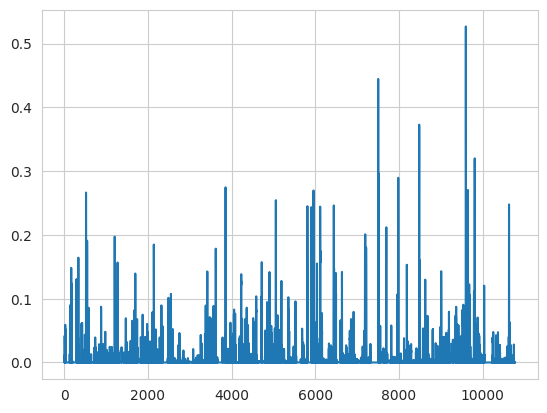

In [30]:
import matplotlib.pyplot as plt

plt.plot(range(len(models[11].train_metrics[0])), 
         models[11].train_metrics[0])
plt.show()

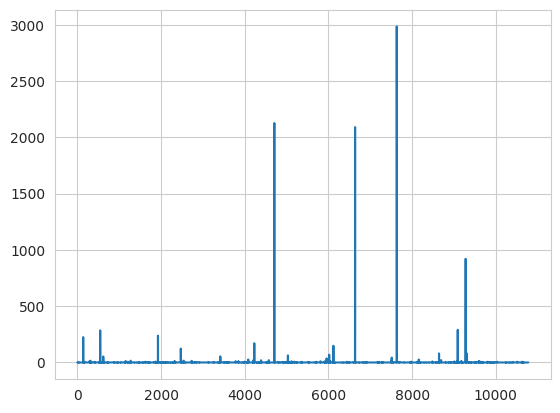

(array([ 139,  140,  292,  313,  544,  545,  618,  619,  620, 1151, 1152,
       1153, 1272, 1924, 1925, 1926, 2324, 2470, 2471, 2540, 2732, 3415,
       3417, 3784, 4083, 4084, 4197, 4198, 4227, 4228, 4390, 4574, 4705,
       4706, 5029, 5030, 5031, 5117, 5808, 5955, 5957, 6017, 6118, 6634,
       6635, 6636, 7500, 7501, 7510, 7511, 7631, 7633, 8157, 8641, 8642,
       8690, 8691, 8692, 9086, 9087, 9089, 9173, 9175, 9277, 9278, 9307,
       9308, 9309, 9594]),)


In [33]:
plt.plot(range(len(models[11].test_metrics[0])), 
         models[11].test_metrics[0])
plt.show()
print(np.where(np.array(models[11].test_metrics[0]) > 10))

In [6]:
models = []
mses = []
for win_size in windows:
    for i in range(1, max_comp_num):
        models.append(load(f"{win_size}_{i}_model.joblib"))
        mses.append(models[-1].test_metrics)


In [9]:
model_loaded = load("10_2_model.joblib")

[Text(50.722222222222214, 0.5, 'Window Size'),
 Text(0.5, 23.52222222222222, 'No. Latent Variables')]

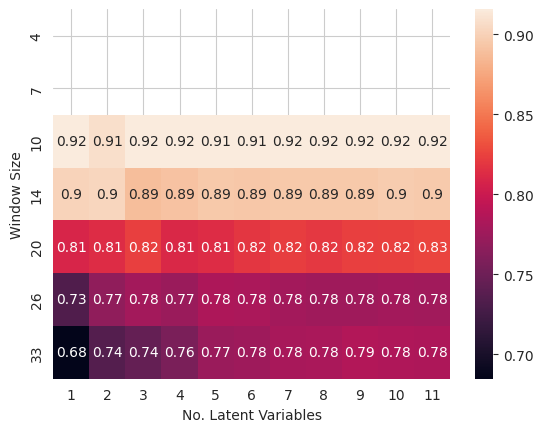

In [31]:
from seaborn import heatmap
from matplotlib.axes import Axes

metrics = np.zeros((len(windows), max_comp_num - 1))
for model in models:
    metric = np.array(model.test_metrics[2])
    metrics[windows.index(model.window_size), model.num_components - 1] = np.mean(metric[metric > 0])
    
ax = heatmap(metrics, annot=True, xticklabels=range(1, max_comp_num), yticklabels=windows)
ax.set(ylabel="Window Size", xlabel="No. Latent Variables")

[Text(50.722222222222214, 0.5, 'Window Size'),
 Text(0.5, 23.52222222222222, 'No. Latent Variables')]

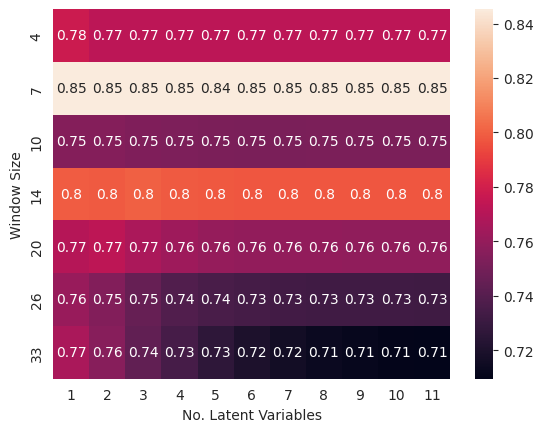

In [30]:
metrics = np.zeros((len(windows), max_comp_num - 1))
for model in models:
    metric = np.array(model.test_metrics[1])
    metric = metric[~np.isnan(metric)]
    metric = metric[metric >= 0.]
    metric = metric[metric <= 1.]
    metrics[windows.index(model.window_size), model.num_components - 1] = np.mean(metric)

ax = heatmap(metrics, annot=True, xticklabels=range(1, max_comp_num), yticklabels=windows)
ax.set(ylabel="Window Size", xlabel="No. Latent Variables")

(array([ 546,  547, 1926, 1927, 4710, 4711, 5964, 6642, 7177, 7644, 8299,
       8652, 8653, 9288, 9289, 9318, 9319]),)
(array([ 546,  547,  876, 1926, 1927, 4710, 4711, 5964, 6642, 7177, 7644,
       8299, 8652, 8653, 9288, 9289, 9318, 9319]),)
(array([ 546,  547,  876, 1926, 1927, 4710, 4711, 5964, 6642, 7177, 7644,
       8299, 8652, 8653, 9288, 9289, 9318, 9319]),)
(array([ 546,  547,  876, 1926, 1927, 4710, 4711, 5964, 6642, 7177, 7644,
       8299, 8652, 8653, 9288, 9289, 9318, 9319]),)
(array([ 546,  547,  876, 1926, 1927, 4710, 4711, 5964, 6642, 7177, 7644,
       8299, 8652, 8653, 9288, 9289, 9318, 9319]),)
(array([ 546,  547,  876, 1926, 1927, 4710, 4711, 5964, 6642, 7177, 7644,
       8299, 8652, 8653, 9288, 9289, 9318, 9319]),)
(array([ 546,  547,  876, 1926, 1927, 4710, 4711, 5964, 6642, 7177, 7644,
       8299, 8652, 8653, 9288, 9289, 9318, 9319]),)
(array([ 546,  547,  876, 1926, 1927, 4710, 4711, 5964, 6642, 7177, 7644,
       8299, 8652, 8653, 9288, 9289, 9318, 9319]),

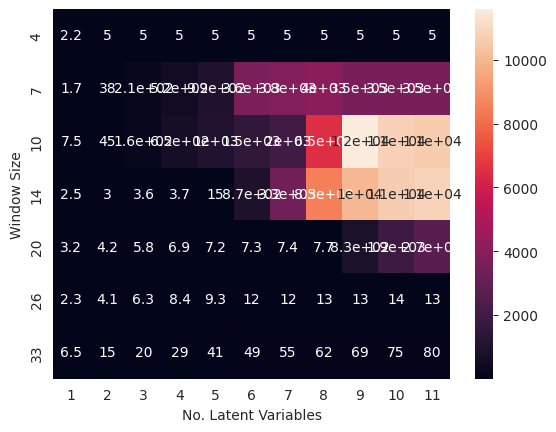

In [33]:
metrics = np.zeros((len(windows), max_comp_num - 1))

outliers = []
for model in models:
    metric = np.array(model.test_metrics[0])
    problem_ids = np.where(metric > 100)
    print(problem_ids)
    metrics[windows.index(model.window_size), model.num_components - 1] = np.mean(metric)

ax = heatmap(metrics, annot=True, xticklabels=range(1, max_comp_num), yticklabels=windows)
ax.set(ylabel="Window Size", xlabel="No. Latent Variables")

print(outliers)


In [18]:
coeffs = []
for model in models[11].model[:]:
    try:
        coeffs.append(np.array(model.coef_.squeeze()))
    except:
        coeffs.append(coeffs[-1])

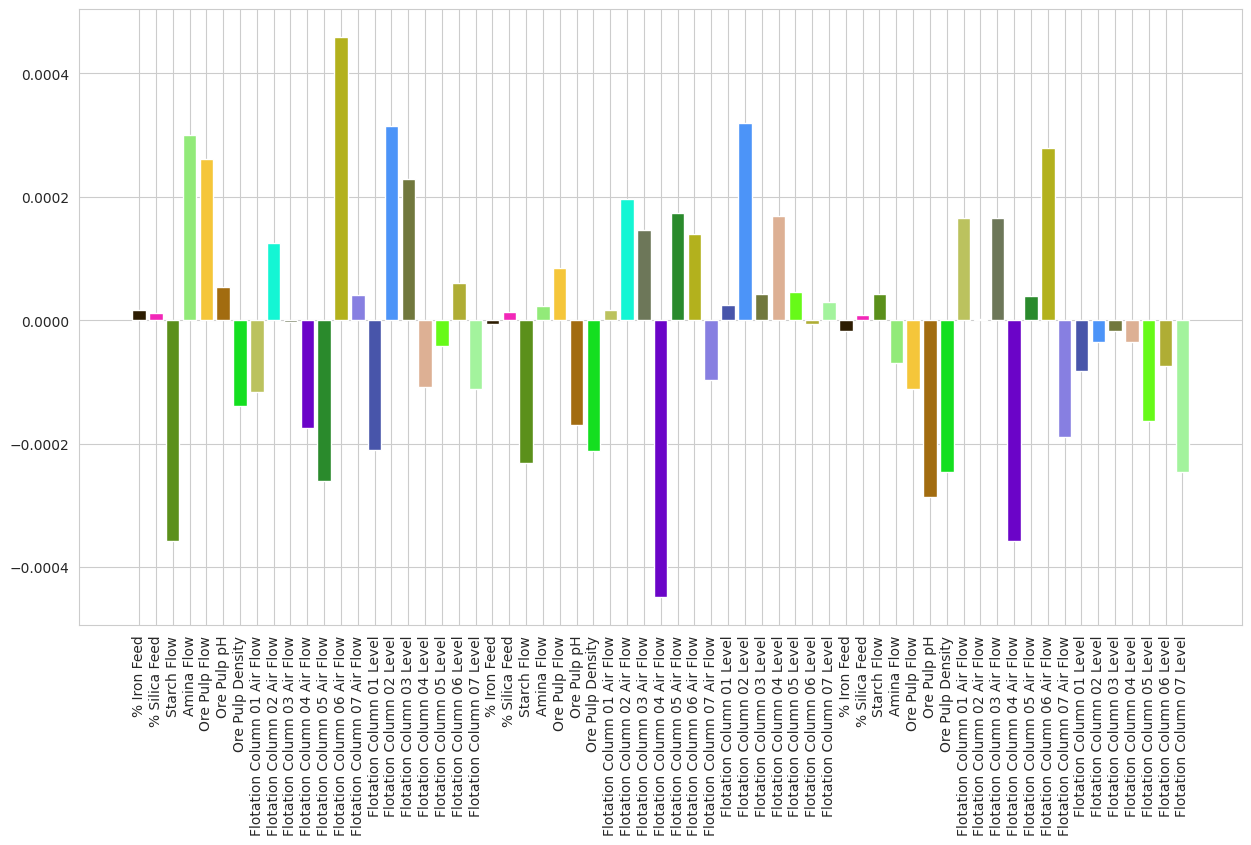

In [19]:
import matplotlib.pyplot as plt

color = [np.random.choice(range(256), size=3) / 256. for _ in range(df_array.shape[1] - 1)]

fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(range(1, np.mean(np.array(coeffs), axis=0).shape[0] + 1), 
        np.mean(np.array(coeffs), axis=0), color=color)
ax.set_xticks(range(1, np.mean(np.array(coeffs), axis=0).shape[0] + 1))
ax.set_xticklabels(list(df.columns[:-1]) * 3, rotation="vertical")
plt.show()

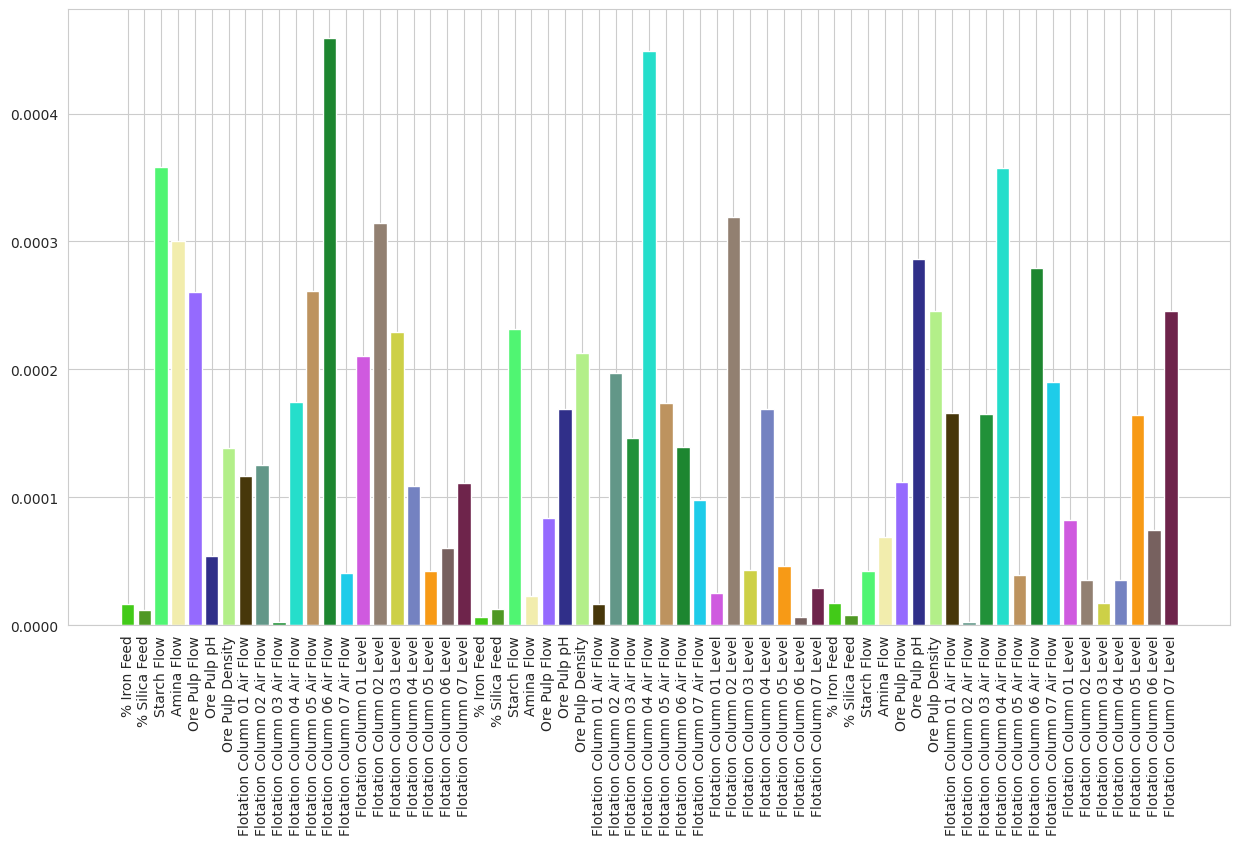

In [20]:
color = [np.random.choice(range(256), size=3) / 256. for _ in range(df_array.shape[1] - 1)]

fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(range(1, np.mean(np.array(coeffs), axis=0).shape[0] + 1), 
        np.abs(np.mean(np.array(coeffs), axis=0)), color=color)
ax.set_xticks(range(1, np.mean(np.array(coeffs), axis=0).shape[0] + 1))
ax.set_xticklabels(list(df.columns[:-1]) * 3, rotation="vertical")
plt.show()

In [ ]:

# # Test model
#
# window_size = 20  # best window_size
# num_of_components = 7 # best num_of_components
#
# test_size = round(0.15*window_size)
# test_start = '2017-04-23 00:00:00' # example start of test partition
# test_start = datetime.datetime.strptime(test_start, '%Y-%m-%d %H:%M:%S')
# flag = 0
#
# row_number = df.index.get_loc(test_start)
#
# # Iterate through the data
# while flag == 0:
#     test_y_end = row_number+test_size+1
#     training_X_start = row_number - round(0.85*window_size)
#     # Stay within included rows
#     if ((test_y_end <= included_rows1[1] and training_X_start >= included_rows1[0])
#     or (test_y_end <= included_rows2[1] and training_X_start >= included_rows2[0])
#     or (test_y_end <= included_rows3[1] and training_X_start >= included_rows3[0])):
#
#         scaler = StandardScaler()
#
#         # Testing set
#         test_X = df_array[row_number:test_y_end-1,:-1]
#         test_y = df_array[row_number+1:test_y_end,-1]
#
#         # Training (+ validation) set
#         training_X = df_array[training_X_start:row_number,:-1]
#         training_y = df_array[training_X_start+1:row_number+1,-1]
#
#         # Lagged predictor variables and the response variable in one matrix
#         test_data = np.column_stack([test_X, test_y])
#         training_data = np.column_stack([training_X, training_y])
#
#         # Compute the mean and std with training data
#         scaler.fit(training_data)
#         # Perform standardization
#         training_data = scaler.transform(training_data)
#         test_data = scaler.transform(test_data)
#
#         if test_y_end == included_rows3[1]:
#             flag = 1
#
#         row_number = row_number + 1
#     else:
#         if test_y_end > included_rows3[1]:
#             flag = 1
#
#         row_number = row_number + 1
#
#         # # TODO model fitting
#         # for _ in [1]:
#         #     ...
#
#         # # TODO model testing
#         # for _ in [1]:
#         #     ...
#